<a href="https://colab.research.google.com/github/ZahibVentura/Simulaci-n-1/blob/main/Estimacion_por_MC_integralcoseno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El valor de la integral es:  0.6351080166857276
Media: 0.6288763614246394
Desviación estándar: 0.010376394871725697


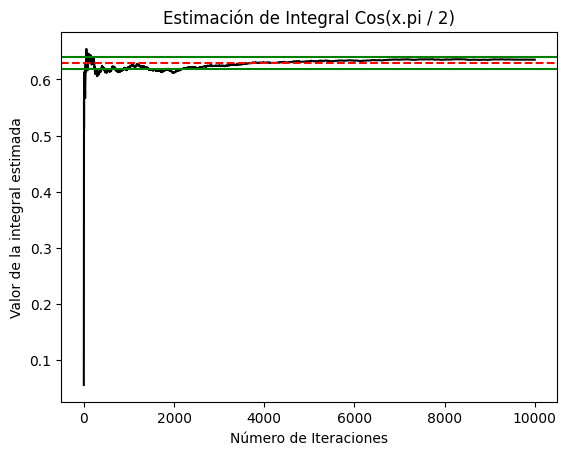

In [37]:
#importamos las librerias
import random as rd
import math as mt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

#definimos el numero de iteraciones
n = 10000
suma = 0
Lista = []	#definimos una lista vacia

#iniciamos nuestro ciclo
for i in range(n):
  x = rd.uniform(0,1) #generamos un numero aleatorio "limites de la integral"
  #evaluamos nuestro numero en la funcion de la integral
  f_x = mt.cos((mt.pi*x)/2)
  suma = suma + f_x
  promedio = suma/(i+1)  #aplicando Monte Carlo
  Lista.append(promedio)

#imprimimos el valor de la integral
print("El valor de la integral es: ",Lista[-1])

# Graficar la estimación de la integral cos(x.pi / 2)
plt.plot(Lista,color='k')

# Cálculo de la media y desviación estándar
media = np.mean(Lista)
desviacion_estandar = np.std(Lista)

# Imprimir los resultados
print("Media:", media)
print("Desviación estándar:", desviacion_estandar)

# Graficar la media y desviacion
plt.axhline(y=media, color='r', linestyle='--', label=f'Media = {media:.4f}')
plt.axhline((desviacion_estandar + media), color='g')  # Límite superior del intervalo
plt.axhline((-desviacion_estandar + media), color='g')  # Límite inferior del intervalo



# Agregar etiquetas y leyenda
plt.xlabel('Número de Iteraciones')
plt.ylabel('Valor de la integral estimada')
plt.title('Estimación de Integral Cos(x.pi / 2)')

plt.show()

¿Cual valor de $N$ elegir?

Ademas:
Estimamos un intervalo de confianza del 90% y dado que $n\geq 30$:
$$\bar{x}-z_{\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}\leq x\leq \bar{x}+z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}}$$

In [38]:
#Calculando el intervalo de confianza
N = 1000
q = 0.05
error_aceptado = desviacion_estandar/mt.sqrt(N)
valor_critico = stats.norm.ppf(1-q)

intervalo_inferior = media - valor_critico*error_aceptado
intervalo_superior = media + valor_critico*error_aceptado

print("El intervalo de confianza es: [",intervalo_inferior,",",intervalo_superior,"]")

El intervalo de confianza es: [ 0.6283366349181906 , 0.6294160879310883 ]
